In [1]:
import os
import time
import datetime
import pytz
import glob
import re
import email

import numpy as np
import pandas as pd

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [68]:
file_path = "/home/christovis/InternetGovernance/proj1/data/target_set/MeetingReports3GPP.h5"

tset = pd.read_hdf(
    file_path,
    key="df",
    header=0,
    index_col=0,
)
tset = tset.dropna()

In [69]:
dates = []
for idx, row in tset.iterrows():
    filename = row['filepath'].split('/')[-1]
    if filename in attr.keys():
        dates.append(attr[filename]['date'])
    else:
        dates.append('')
        
tset['date'] = dates

,diffie-hellman,forward secreci,imsi,imsi catcher,interconnect secur,locat track,n32,perfect forward secreci,perman identifi,pfs,rogu base station,sba,secur edg protect proxi,sepp,servic base architectur,sms intercept,ss7,filepath,token_count,date
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,21861,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,2056,
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,84538,
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,/home/christovis/InternetGovernance/bigbang/ar...,92349,
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,9223,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,/home/christovis/InternetGovernance/bigbang/ar...,95731,
462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,7957,
463,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,55321,
464,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/christovis/InternetGovernance/bigbang/ar...,15880,


In [3]:
kt = tset.columns.drop(['token_count', 'filepath'])

In [4]:
kt_mean = [c/len(tset.index) for c in tset[kt].sum(axis=0)]
kt_max = tset[kt].max(axis=0)

In [29]:
percentiles = [25., 50., 75., 90., 99.]
stats = {str(p): [] for p in percentiles}
stats['max'] = []

for col in kt:
    counts = tset[tset[col] != 0][col].values
    for p in percentiles:
        stats[str(p)].append(np.percentile(counts, p))
    stats['max'].append(np.max(counts))
stats = pd.DataFrame.from_dict(stats)
stats.set_index(kt)

,25.0,50.0,75.0,90.0,99.0,max
diffie-hellman,2.00,3.0,5.00,6.0,6.00,6
forward secreci,1.00,2.0,2.00,2.0,3.58,4
imsi,2.00,4.0,7.00,12.0,23.56,53
imsi catcher,1.00,1.0,1.00,1.0,1.00,1
interconnect secur,1.25,1.5,1.75,1.9,1.99,2
locat track,1.00,2.0,2.00,3.2,3.92,4
n32,4.00,8.0,23.00,34.0,40.40,41
perfect forward secreci,2.00,2.0,2.00,2.0,2.00,2
perman identifi,1.50,2.0,3.50,7.4,10.64,11
pfs,1.00,1.0,4.00,7.3,9.66,10


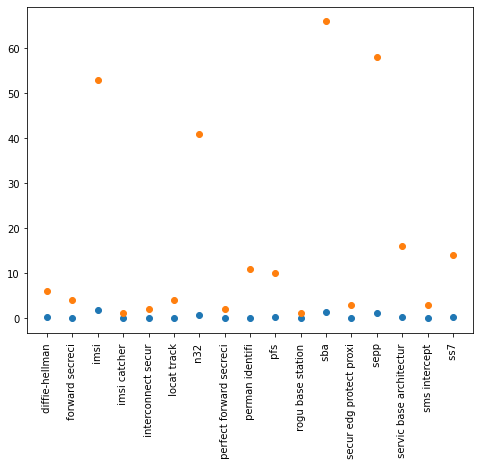

In [5]:
fig, axis = plt.subplots(
    1, 1,
    figsize=(8, 6),
    sharex=True, sharey='row',
    facecolor="w", edgecolor="k",
)

x = np.arange(len(kt))
axis.scatter(
    x,
    kt_mean,
    #color='b'
)
axis.scatter(
    x,
    kt_max,
    #color='b'
)

ax, txt = plt.xticks(x, kt, rotation='vertical')

#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'
#ax.set_xticklabels(labels)

In [42]:
folder_new = "/home/christovis/InternetGovernance/proj1/data/target_set/MeetingReports3GPP_maxcount"

files = []
for col, count in zip(kt, tset[kt].max(axis=0)):
    print('column: %s' % col)
    tset_sel = tset[tset[col] == count]
    for idx, row in tset_sel.iterrows():
        print(row['filepath'].split('/')[-1])
        #os.system(f"cp {row['filepath']} {folder_new}")
        files.append(row['filepath'].split('/')[-1])
    print('')

column:  diffie-hellman 
TSGS3_40_Slovenia_Report_Draft_Rep_v003_SA3_40_Draft_Rep_v003_SA3_40.doc
TSGS3_40_Slovenia_Report_Draft_Rep_v002_SA3_40_Draft_Rep_v002_SA3_40.doc
TSGS3_40_Slovenia_Report_S3-050806_S3-050806.doc
2005_06_Tbilisi_Docs_S3LI05_110 SA3#40 Draft Report_Draft_Rep_v004_SA3_40.doc
TSGS3_40_Slovenia_Report_Draft_Rep_v004_SA3_40_Draft_Rep_v004_SA3_40.doc

column:  forward secreci 
TSGS3_90_Gothenburg_Report_MeetingReport_SA3_90.doc

column:  imsi 
TSGS3_87_Ljubljana_Report_MeetingReport__SA3_87.doc

column:  imsi catcher 
TSGS3_90Bis_SanDiego_Report_MeetingReport__SA3_90_Bis.doc
TSGS3_87_Ljubljana_Report_MeetingReport__SA3_87.doc

column:  interconnect secur 
TSGS3_89_Reno_Report_MeetingReport__SA3_89.doc

column:  locat track 
TSGS3_76_Sophia_Report_MeetingReport__SA3#76.doc

column:  n32 
TSGS3_92Bis_Harbin_Report_MeetingReport_SA3_92AH.docx

column:  perfect forward secreci 
TSGS3_65_San_Diego_Report_FinalMeetingReport_SA3_65.doc
TSGS3_40_Slovenia_Report_Draft_Rep_v003

In [45]:
import yaml
file = '/home/christovis/InternetGovernance/proj1/data/target_set/MeetingReports3GPP_maxcount_attributes.yaml'

with open(file) as file:
    attr = yaml.load(file, Loader=yaml.FullLoader)
    
attr

{'2004_10_San_Antonio_Docs_S3LI04_183 San Antonio draft report_S3LI04_183 San Antonio draft report.doc': {'date': '10/2004',
  'number_nr': None},
 '2005_01_Barcelona_Docs_S3LI05_002 San Antonio draft report_S3LI05_002 San Antonio draft report.doc': {'date': '01/2005',
  'number_nr': None},
 '2005_01_Barcelona_Docs_S3LI05_002r1 San Antonio Meeting Report_S3LI05_002r1 San Antonio draft report.doc': {'date': '01/2005',
  'number_nr': None},
 '2005_06_Tbilisi_Docs_S3LI05_110 SA3#40 Draft Report_Draft_Rep_v004_SA3_40.doc': {'date': '09/2005',
  'number_nr': None},
 'TSGS3_05_9908_docs_AP99d064_draft_rep_SMG10_1_99_AP99d064_SMG10RepV002.doc': {'date': '03/1999',
  'number_nr': None},
 'TSGS3_105e_Report_MeetingReport__SA3_105e.docx': {'date': '11/2021',
  'number_nr': 105},
 'TSGS3_40_Slovenia_Report_Draft_Rep_v001_SA3_40_Draft_Rep_v001_SA3_40.doc': {'date': '09/2005',
  'number_nr': None},
 'TSGS3_40_Slovenia_Report_Draft_Rep_v002_SA3_40_Draft_Rep_v002_SA3_40.doc': {'date': '09/2005',
  'n